In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
ratings = pd.read_csv('../Data/jesterfinal151cols.csv',
                      delimiter=',',
                      header=None)
ratings

,0,1,2,3,4,5,6,7,8,9,...,141,142,143,144,145,146,147,148,149,150
0,62,99,99,99,99,0.21875,99,-9.28125,-9.28125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
1,34,99,99,99,99,-9.68750,99,9.93750,9.53125,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
2,18,99,99,99,99,-9.84375,99,-9.84375,-7.21875,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
3,82,99,99,99,99,6.90625,99,4.75000,-5.90625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
4,27,99,99,99,99,-0.03125,99,-9.09375,-0.40625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50687,15,99,99,99,99,99.00000,99,-5.93750,-3.71875,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,-1.15625,99.0,-1.1875
50688,12,99,99,99,99,99.00000,99,-5.71875,-8.15625,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,3.06250,99.0,99.0000
50689,14,99,99,99,99,99.00000,99,0.09375,0.09375,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000
50690,29,99,99,99,99,99.00000,99,-0.12500,-0.12500,99,...,99.0,99.0,99.0,99.0,99.0,99.0,99.0,99.00000,99.0,99.0000


*Rating Matrix Analysys*

In [151]:
null_placeholder = 99
ratings_matrix = ratings.iloc[:,1:]
data_audit = ratings_matrix.describe().round(2).T
size = len(ratings_matrix)
missing_count = (ratings_matrix == null_placeholder).sum()
data_audit['NUM_MISSING'] = missing_count
data_audit['%_MISSING'] = np.round(missing_count/size*100, 2)
data_audit['NUM_UNIQUE'] = ratings_matrix.nunique()
data_audit['%_UNIQUE'] = np.round(ratings_matrix.nunique() / size * 100, 2)

data_audit

,count,mean,std,min,25%,50%,75%,max,NUM_MISSING,%_MISSING,NUM_UNIQUE,%_UNIQUE
1,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
2,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
3,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
4,50692.0,99.00,0.00,99.0,99.00,99.0,99.0,99.0,50692,100.00,1,0.00
5,50692.0,97.87,10.63,-10.0,99.00,99.0,99.0,99.0,50126,98.88,352,0.69
...,...,...,...,...,...,...,...,...,...,...,...,...
146,50691.0,89.42,29.28,-10.0,99.00,99.0,99.0,99.0,45779,90.31,640,1.26
147,50691.0,80.35,38.35,-10.0,99.00,99.0,99.0,99.0,40964,80.81,641,1.26
148,50691.0,70.64,43.86,-10.0,8.16,99.0,99.0,99.0,35704,70.43,641,1.26
149,50691.0,78.10,39.84,-10.0,99.00,99.0,99.0,99.0,39723,78.36,642,1.27


**Analysys of the first column** <br/>
We see that the first column of the ratings data frame does not correspond to valid rating value (the rating values are in interval [-10, 10] ).<br/> We suppose that should be the number jokes that user has rated. (value != 99).

In [116]:
result = pd.DataFrame({
    'first_column': ratings.iloc[:, 0],  
    'valid_ratings_count': (ratings.iloc[:, 1:] != 99).sum(axis=1)
})
result

,first_column,valid_ratings_count
0,62,62
1,34,34
2,18,18
3,82,82
4,27,27
...,...,...
50687,15,15
50688,12,12
50689,14,14
50690,29,29


In [117]:
different_rows = result[result['first_column'] != result['valid_ratings_count']]
print("Different row values:")
print(different_rows)

Different row values:
       first_column  valid_ratings_count
50691            19                   45


We see a difference only in user #50691. This may be error in the data set. We will fix it and give correct valid ratings count (45) and move on with our EDA.

In [118]:
row = 50691
col = 0
valid_value = 45
ratings.iat[row, col] = valid_value

res = pd.DataFrame({
    'first_column': ratings.iloc[:, 0],  
    'valid_ratings_count': (ratings.iloc[:, 1:] != 99).sum(axis=1)
})
res

,first_column,valid_ratings_count
0,62,62
1,34,34
2,18,18
3,82,82
4,27,27
...,...,...
50687,15,15
50688,12,12
50689,14,14
50690,29,29


**Calculating sparcity**

In [119]:
total_missing = data_audit['NUM_MISSING'].sum()
matrix_size = ratings_matrix.shape[0]*ratings_matrix.shape[1]
print(f'Number of missing ratings: {total_missing}')
print(f'Total number of ratings: {matrix_size}')
print(f'% MISSING RATINGS (Sparcity): {np.round(total_missing/matrix_size*100, 2)}')


Number of missing ratings: 5874925
Total number of ratings: 7603800
% MISSING RATINGS (Sparcity): 77.26


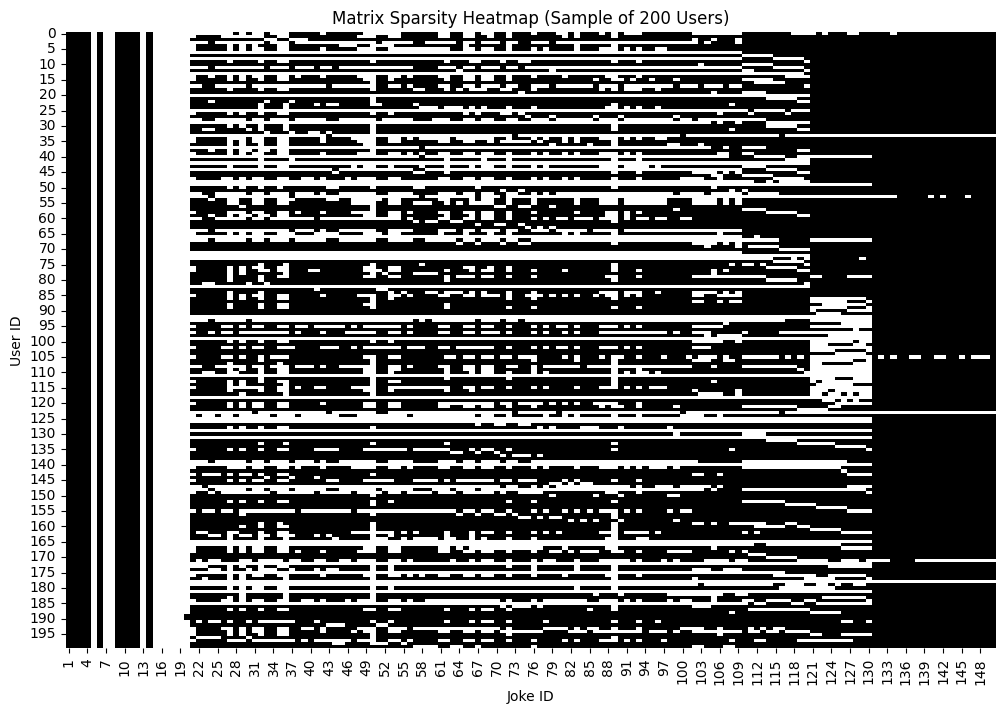

In [152]:
plt.figure(figsize=(12, 8))
sample_matrix = ratings_matrix.iloc[:200,:]
sns.heatmap(sample_matrix == 99, cbar=False, cmap='binary')
plt.title('Matrix Sparsity Heatmap (Sample of 200 Users)')
plt.xlabel('Joke ID')
plt.ylabel('User ID')
plt.savefig('../images/sparcity_heatmap.png')
plt.show()

<summary>
This picture shows the sparcity of the data with sample of 200 users. The matrix is sparce (77%). We can see that on the gauge set there are no missing ratings. We can also observe some users that have rated amlost all jokes (User_ID 125, 75, 165)
</summary>

In [121]:
valid_ratings = ratings_matrix.values[ratings_matrix.values != 99]

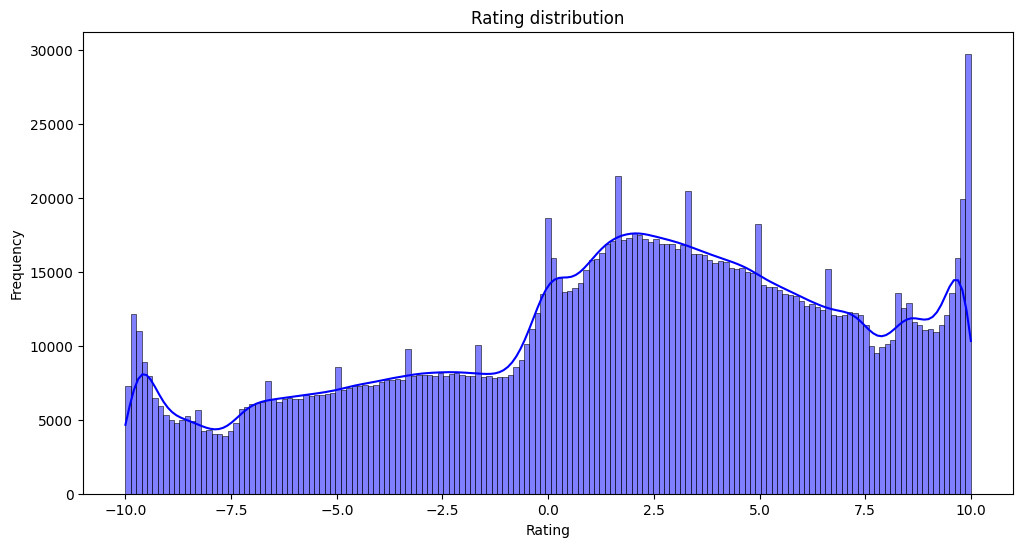

In [122]:
plt.figure(figsize=(12, 6))
sns.histplot(valid_ratings, color='blue', kde=True)
plt.title('Rating distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.savefig('../images/rating_distribution.png')
plt.show()

<summary>
 Тhere is a clear positivity bias, as the majority of ratings are concentrated on the positive side of the scale. The highest density occurrs in the 1.0 to 4.0 range. This suggests that users generally find the jokes somewhat amusing rather than offensive or boring. We see a peaks at the end and at the beginning of the interval. This suggests some users are emotional and rate the joke either with 10 or -10. We may need to use normalization techniques.
</summary>

**Ratings per User**

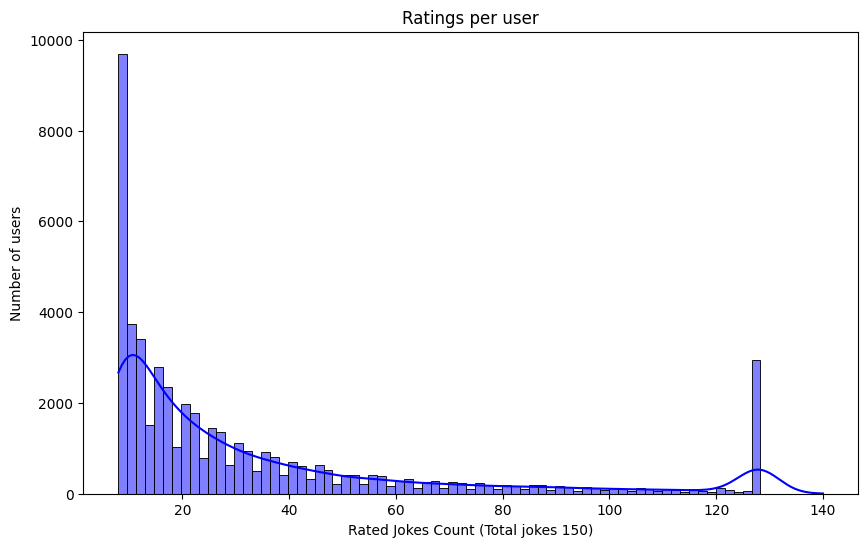

In [123]:
plt.figure(figsize=(10, 6))
sns.histplot(x=ratings[0], color='blue', kde=True)
plt.title('Ratings per user')
plt.xlabel('Rated Jokes Count (Total jokes 150)')
plt.ylabel('Number of users')
plt.savefig('../images/ratings_per_user.png')
plt.show()

<summary>
As wee see the majority of users does not rate the jokes. This also verifies the 77% matriz sparcity that we have discovered. There is a small peak at the right that indicates that there are users that have rated almost all of the jokes
</summary>

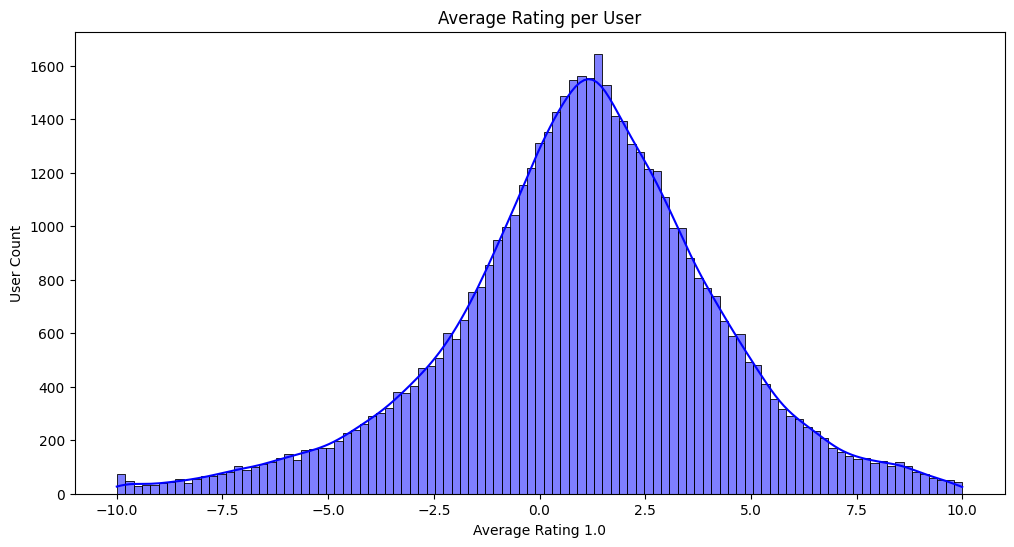

In [124]:
plt.figure(figsize=(12, 6))

user_bias = ratings_matrix.apply(lambda row: row[row != 99].mean(), axis=1)

sns.histplot(user_bias, color='blue', kde=True)
plt.title('Average Rating per User')
plt.xlabel(f'Average Rating {np.round(user_bias.mean(),2)}')
plt.ylabel('User Count')
plt.savefig('../images/avg_rating_per_user.png')
plt.show()

<summary>
This graph shows a near-normal distribution that is centered slightly to the right of zero (around +1.2). This indicates that while individual ratings can be extreme, the average sentiment of most users is moderately positive.
</summary>

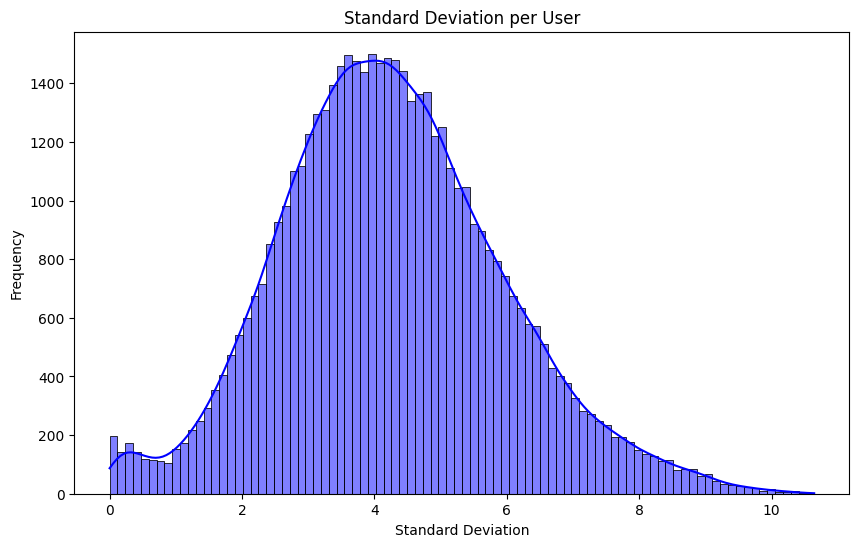

In [125]:
plt.figure(figsize=(10, 6))
user_std = ratings_matrix.apply(lambda x: x[x != 99].std(), axis=1)

sns.histplot(user_std, color='blue', kde=True)
plt.title('Standard Deviation per User')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('../images/user_std.png')
plt.show()

<summary>
We can see again a bell-shaped curve. Most users exhibit a standard deviation centered around 4.0. This indicates significant variability in their responses. This suggests that users are generally expressive and distinguish clearly between jokes they like and dislike. This is a positive trait for building a collaborative filtering model. A notable observation is the small spike at 0.0, representing users who provided the exact same rating for every joke they encountered. These raters does not provide additional information. The wide spread of standard deviations (from 1.0 to over 8.0)  suggests that some users are more conservative in their scoring while others are more polarized. We may use Z-score normalization.
</summary>

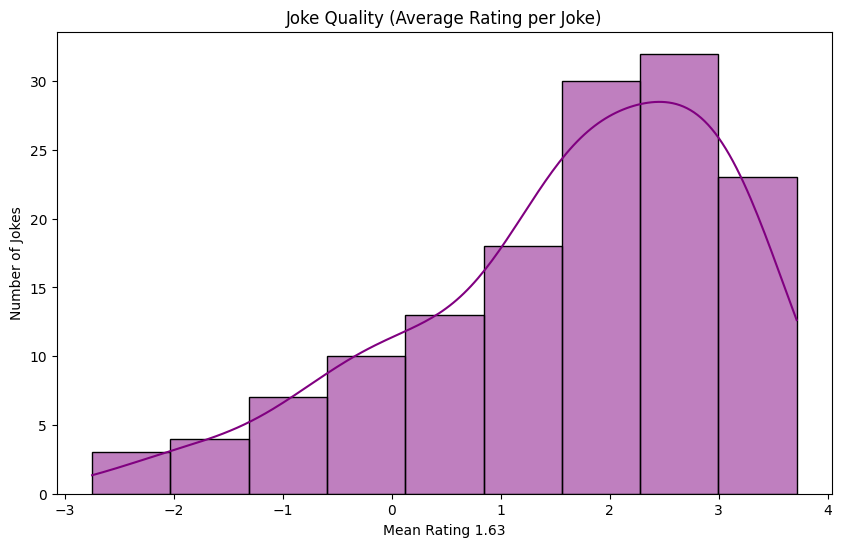

In [126]:
plt.figure(figsize=(10, 6))
joke_avg_rating = ratings_matrix.apply(lambda col: col[col != 99].mean(), axis=0)

sns.histplot(joke_avg_rating, color='purple', kde=True)
plt.title('Joke Quality (Average Rating per Joke)')
plt.xlabel(f'Mean Rating {np.round(joke_avg_rating.mean(),2)}')
plt.ylabel('Number of Jokes')
plt.savefig('../images/avg_rating_per_joke.png')
plt.show()

<summary>
The distribution is skewed to the left with the majority of jokes maintaining a mean rating between 1.5 and 3.5. Only a small fraction of the 150 jokes have a negative average. This indicates that the dataset consists of generally well-received content.
</summary>

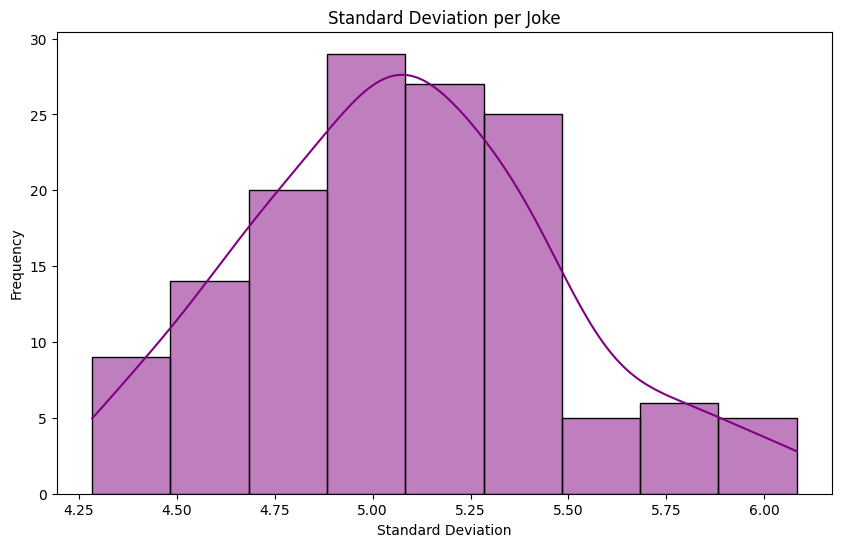

In [127]:
plt.figure(figsize=(10, 6))
jokes_std = ratings_matrix.apply(lambda x: x[x != 99].std(), axis=0)

sns.histplot(jokes_std, color='purple', kde=True)
plt.title('Standard Deviation per Joke')
plt.xlabel('Standard Deviation')
plt.ylabel('Frequency')
plt.savefig('../images/jokes_std.png')
plt.show()

<summary>
The Standard Deviation per Joke distribution highlights the inherent subjectivity and polarizing nature of humor within the dataset. Most jokes exhibit a high standard deviation, centered between 4.75 and 5.5. This high variance indicates a lack of consensus. There is no "universally" liked or disliked joke. It depends on the user profile.
</summary>

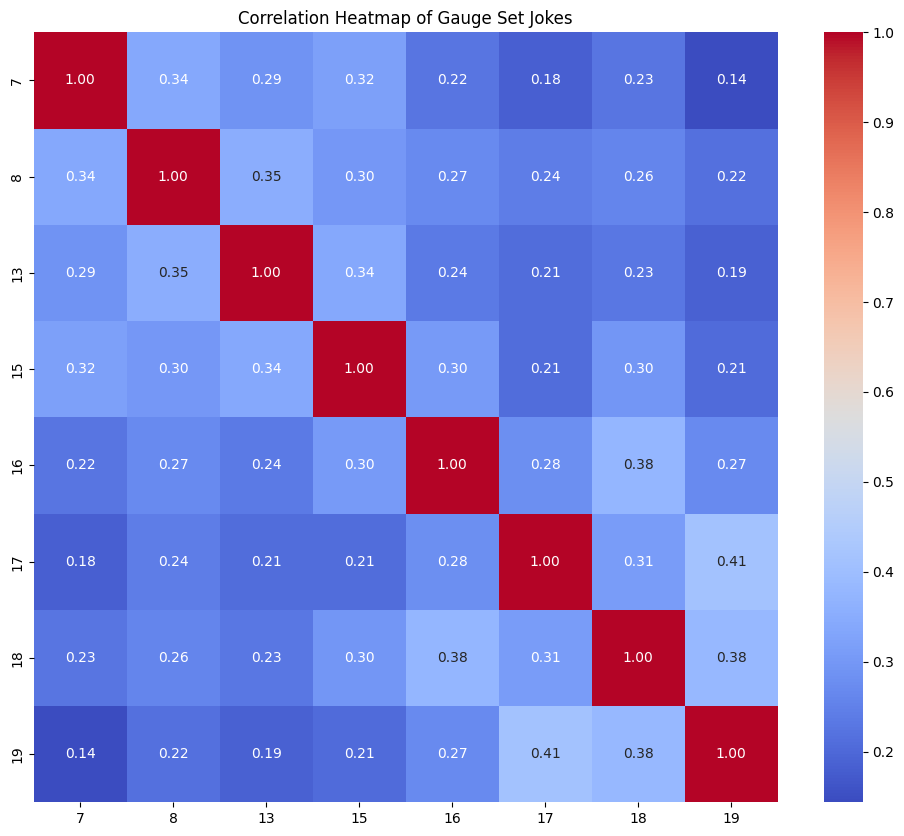

In [128]:
plt.figure(figsize=(12, 10))
gauge_cols = [7, 8, 13, 15, 16, 17, 18, 19]
gauge_corr = ratings_matrix[gauge_cols].replace(99, np.nan).corr()
sns.heatmap(gauge_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Gauge Set Jokes')
plt.savefig('../images/gauge_set_heatmap.png')
plt.show()

<summary>
On this graph we can see the corelation between jokes on the gauge set.  All observed correlations are positive, ranging from 0.14 to 0.41. A clear humor cluster is visible among jokes 17, 18, and 19, which exhibit the highest inter-correlations. This suggests these jokes likely share a similar theme or comedic structure.
</summary>

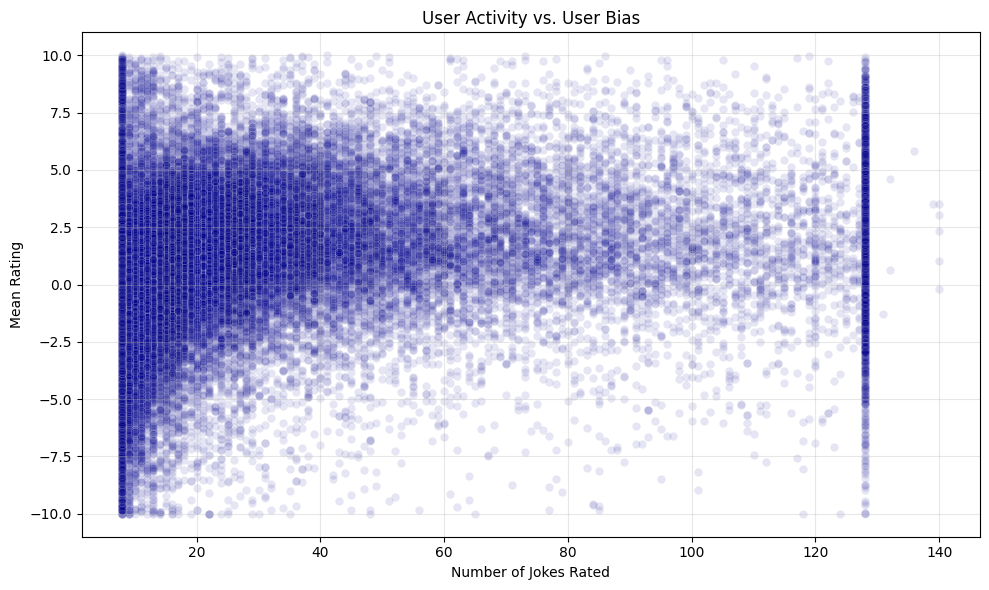

In [129]:
plt.figure(figsize=(10, 6))
user_bias = ratings_matrix.apply(lambda row: row[row != 99].mean(), axis=1)


sns.scatterplot(x=ratings[0], y=user_bias, alpha=0.1, color='darkblue')
plt.title('User Activity vs. User Bias')
plt.xlabel('Number of Jokes Rated')
plt.ylabel('Mean Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/usr_activity_bias.png')
plt.show()

<summary>
The scatter plot illustrates a case of statistical convergence. We can  observe a "funnel" effect. Users with low activity exhibit extreme variance in their mean ratings. As user activity increases, the mean ratings tend to regress toward the global mean. For power users who have rated over 100 jokes the bias stabilizes significantly and only small number of users maintaining extreme average scores. 
</summary>

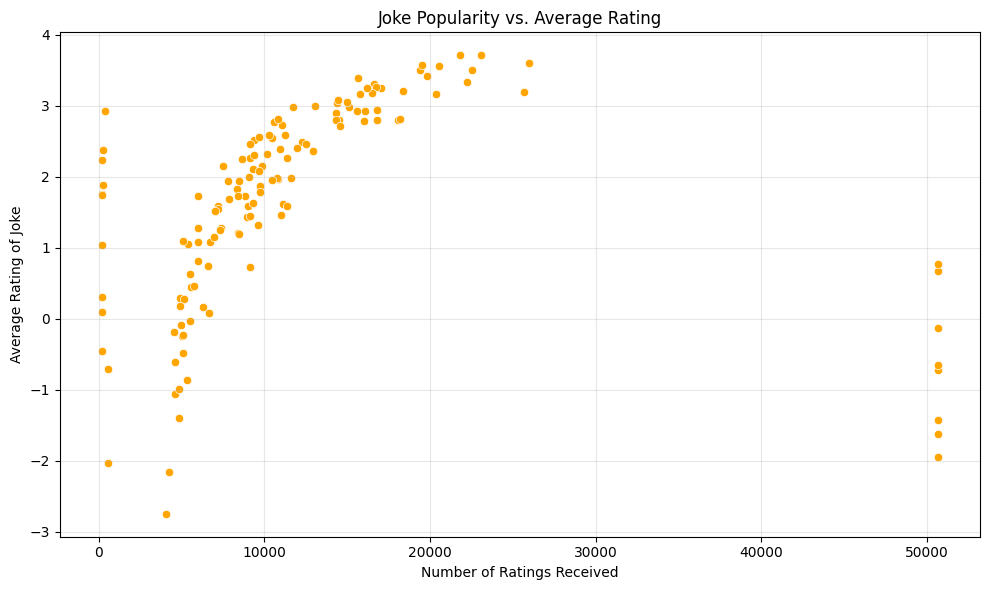

In [130]:
plt.figure(figsize=(10, 6))
joke_means = ratings_matrix.apply(lambda col: col[col != 99].mean()).sort_values(ascending=False)
joke_counts = (ratings_matrix != 99).sum().sort_values(ascending=False)

sns.scatterplot(x=joke_counts, y=joke_means, color='orange')
plt.title('Joke Popularity vs. Average Rating')
plt.xlabel('Number of Ratings Received')
plt.ylabel('Average Rating of Joke')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../images/jokes_popularity_rating.png')
plt.show()

<summary> 
This graph reveals a strong positive correlation between jokes popularity and average rating. A dominant feature is the vertical cluster at the far right (50,000+ ratings). These items constitute the gauge set. These jokes do not have the highest average ratings. They span a mediocre range from -2 to +1 suggesting they have the ability to differentiate user tastes.
</summary>

In [131]:
ratings_matrix = ratings_matrix.replace(99, np.nan)
gauge_ids = [7, 8, 13, 15, 16, 17, 18, 19]

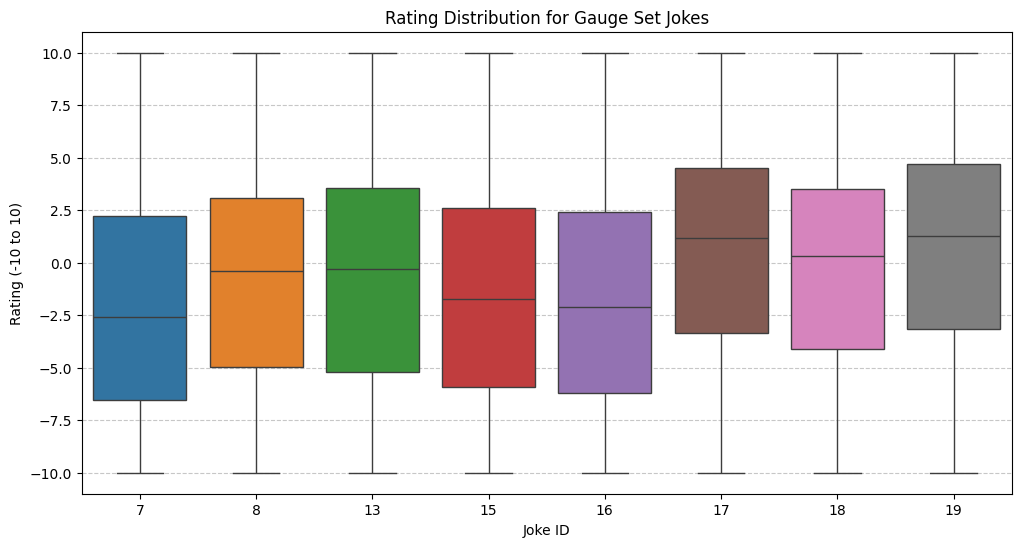

In [132]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=ratings_matrix[gauge_ids])
plt.title('Rating Distribution for Gauge Set Jokes')
plt.xlabel('Joke ID')
plt.ylabel('Rating (-10 to 10)')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('../images/gauge_set_boxplot.png')
plt.show()

<summary> 
The Rating Distribution for Gauge Set Jokes (box plot) shows that the whiskers for every joke extend across the entire scale from -10 to +10 proving that every joke in this set triggers the full range of human emotional response. This again verifies the abality of the set to differenctiate users taste.
</summary>

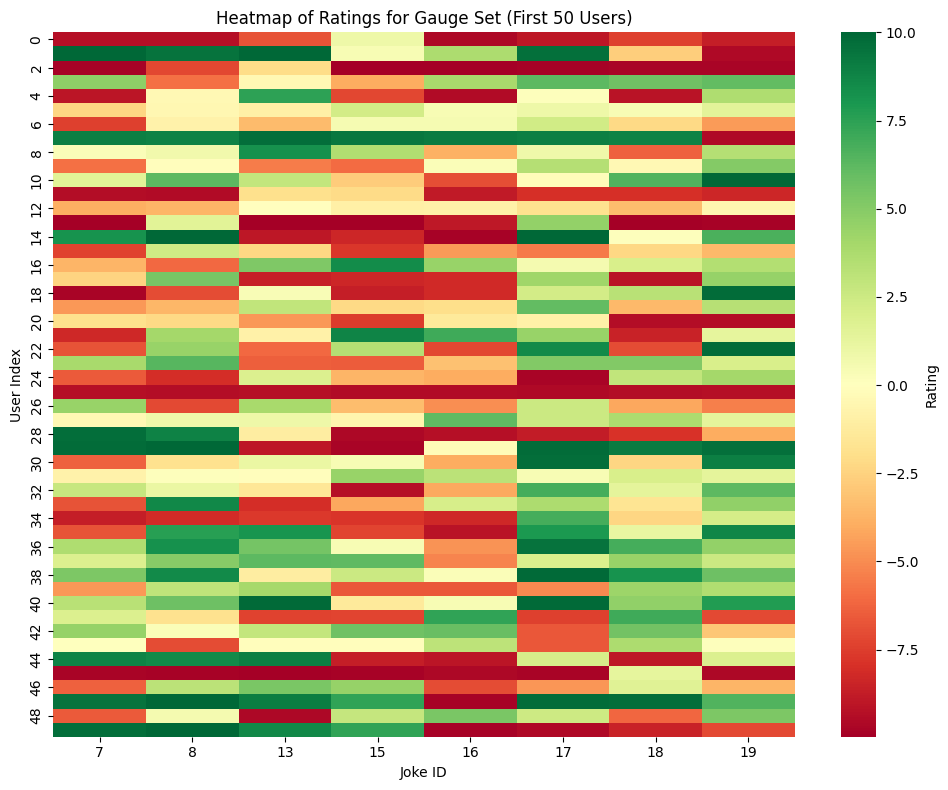

In [136]:
plt.figure(figsize=(10, 8))

sns.heatmap(ratings[gauge_ids].iloc[:50], cmap='RdYlGn', center=0, cbar_kws={'label': 'Rating'})
plt.title('Heatmap of Ratings for Gauge Set (First 50 Users)')
plt.xlabel('Joke ID')
plt.ylabel('User Index')
plt.tight_layout()
plt.savefig('../images/gauge_set_heatmap_50.png')
plt.show()

<summary> 
The heatmap clearly visualizes distinct user archetypes through horizontal patterns. Some users (e.g., indices 37 and 49) are "easy to please". However others (e.g., indices 1 and 14) are "hard to please". The "selective" users who display a mix of extreme red and green provide the most value for the reccomendation models.
</summary>

In [138]:
mean_ratings = ratings_matrix.mean().sort_values(ascending=False)
mean_ratings.head()

53     3.714249
105    3.711070
89     3.606178
129    3.583135
35     3.560140
dtype: float64

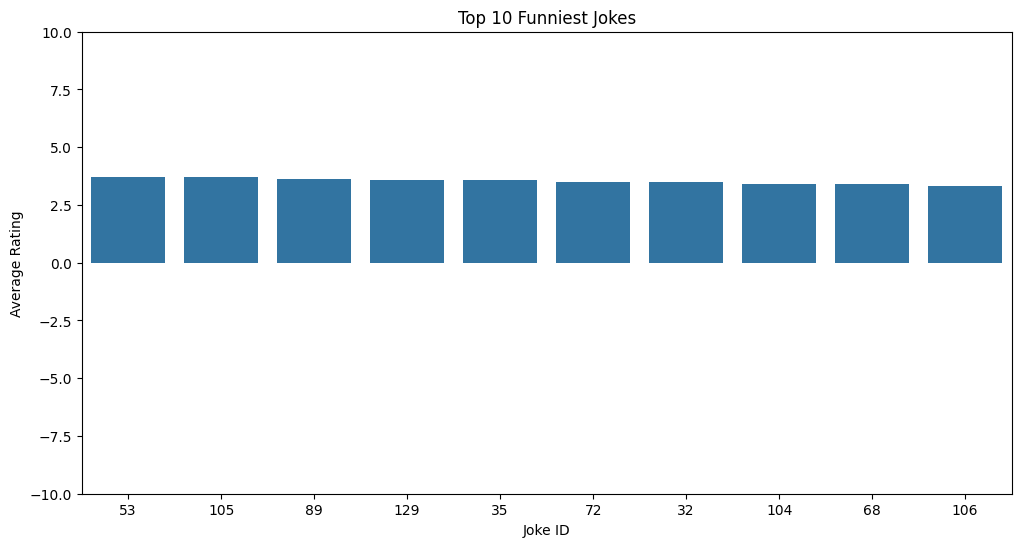

In [142]:
plt.figure(figsize=(12, 6))
top_10_funniest = mean_ratings.head(10)
sns.barplot(x=top_10_funniest.index, y=top_10_funniest.values, order=top_10_funniest.index)
plt.title('Top 10 Funniest Jokes')
plt.xlabel('Joke ID')
plt.ylabel('Average Rating')
plt.ylim(-10, 10)
plt.savefig('../images/top_10.png') 
plt.show()

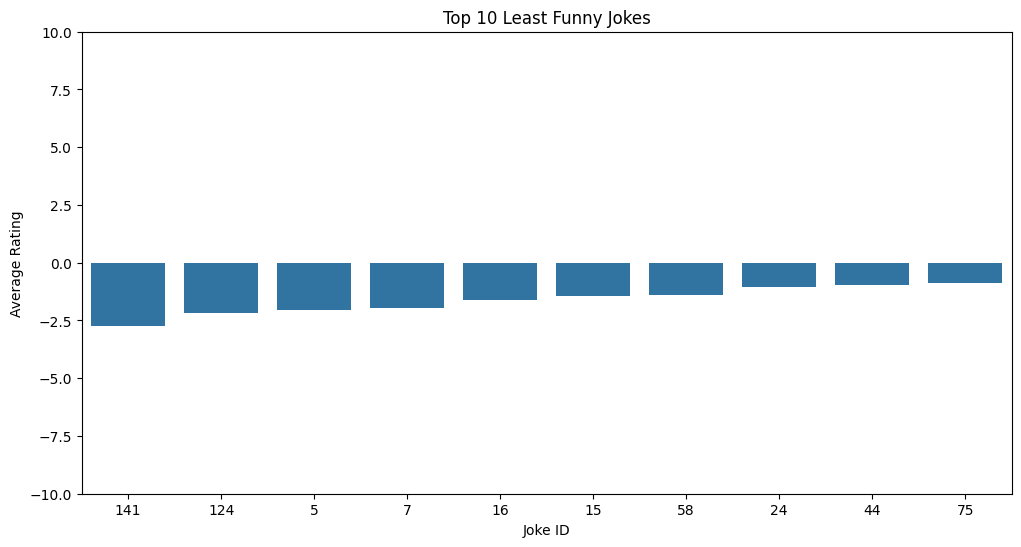

In [148]:
top_10_boring = mean_ratings.dropna().tail(10).sort_values()
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_boring.index, y=top_10_boring.values, order=top_10_boring.index)
plt.title('Top 10 Least Funny Jokes')
plt.xlabel('Joke ID')
plt.ylabel('Average Rating')
plt.ylim(-10, 10)
plt.savefig('../images/least_10.png') 
plt.show()

In [134]:
ratings.to_csv('../Data/processed_ratings.csv', index=False)